# 미니 프로젝트 : 스마트폰 센서 데이터 기반 모션 분류
> 스마트폰 센서를 통해 사람 행동을 분류하는 모델 개발

<img src = "https://www.snubh.org/upload/ce3/namoimage/images/000073/202111_03_04.png"/>

# **1.환경설정**

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

import joblib



---



# **2.데이터셋 분석**

## **(1) 데이터 불러오기**
* 데이터셋
    * data01_train.csv : 학습 및 검증용
    * data01_test.csv : 테스트용
    * feature.csv : feature 이름을 계층구조로 정리한 데이터  


In [21]:
path = '/content/drive/MyDrive/AIVLE/Mini_project/'

train = pd.read_csv(path + 'data01_train.csv')
# test = pd.read_csv(path + 'data01_test.csv')
features = pd.read_csv(path + 'features.csv')

In [22]:
# Subject Columns 제거
train.drop('subject', axis = 1, inplace = True)
# test.drop('subject', axis = 1, inplace = True)

## **(2) Meta 정보 확인**
- 데이터의 형태, 기초통계량, 정보 등을 확인

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 25.2+ MB


In [24]:
# Dataset 차원
train.shape

(5881, 562)

In [25]:
# NaN 값 확인
train.isna().sum().sort_values(ascending = False)

tBodyAcc-mean()-X            0
fBodyAccJerk-skewness()-Y    0
fBodyAccJerk-maxInds-Z       0
fBodyAccJerk-meanFreq()-X    0
fBodyAccJerk-meanFreq()-Y    0
                            ..
tBodyGyroJerk-iqr()-Z        0
tBodyGyroJerk-iqr()-Y        0
tBodyGyroJerk-iqr()-X        0
tBodyGyroJerk-energy()-Z     0
Activity                     0
Length: 562, dtype: int64

In [26]:
# 기초 통계량
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,...,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000
mean,0.274811,-0.017799,-0.109396,-0.603138,-0.509815,-0.604058,-0.628151,-0.525944,-0.605374,-0.465490,...,0.126955,-0.305883,-0.623548,0.008524,-0.001185,0.009340,-0.007099,-0.491501,0.059299,-0.054594
std,0.067614,0.039422,0.058373,0.448807,0.501815,0.417319,0.424345,0.485115,0.413043,0.544995,...,0.249176,0.322808,0.310371,0.339730,0.447197,0.608190,0.476738,0.509069,0.297340,0.278479
min,-0.503823,-0.684893,-1.000000,-1.000000,-0.999844,-0.999667,-1.000000,-0.999419,-1.000000,-1.000000,...,-0.965725,-0.979261,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.980143
25%,0.262919,-0.024877,-0.121051,-0.992774,-0.977680,-0.980127,-0.993602,-0.977865,-0.980112,-0.936067,...,-0.021610,-0.541969,-0.845985,-0.122361,-0.294369,-0.481718,-0.373345,-0.811397,-0.018203,-0.141555
50%,0.277154,-0.017221,-0.108781,-0.943933,-0.844575,-0.856352,-0.948501,-0.849266,-0.849896,-0.878729,...,0.133887,-0.342923,-0.712677,0.010278,0.005146,0.011448,-0.000847,-0.709441,0.182893,0.003951
75%,0.288526,-0.010920,-0.098163,-0.242130,-0.034499,-0.262690,-0.291138,-0.068857,-0.268539,-0.013690,...,0.288944,-0.127371,-0.501158,0.154985,0.285030,0.499857,0.356236,-0.511330,0.248435,0.111932
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,0.977344,0.478157,1.000000


In [27]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sensor        561 non-null    object
 1   agg           561 non-null    object
 2   axis          436 non-null    object
 3   feature_name  561 non-null    object
dtypes: object(4)
memory usage: 17.7+ KB


In [28]:
features.shape

(561, 4)

In [29]:
# NaN 값 확인
features.isna().sum().sort_values(ascending = False)

axis            125
sensor            0
agg               0
feature_name      0
dtype: int64

In [30]:
# 기초 통계량
features.describe()

,sensor,agg,axis,feature_name
count,561,561,436,561
unique,18,27,62,533
top,fBodyGyro,bandsEnergy(),X,"fBodyGyro-bandsEnergy()-25,32"
freq,79,126,76,3




---



# **3.단변량 분석**

## **(1) Target 단변량 분석**

In [31]:
target = 'Activity'

In [32]:
train[target].unique()

array(['STANDING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS', 'SITTING'], dtype=object)

In [33]:
train[target].value_counts(normalize=True)

Activity
LAYING                0.189594
STANDING              0.184833
SITTING               0.175480
WALKING               0.169699
WALKING_UPSTAIRS      0.145894
WALKING_DOWNSTAIRS    0.134501
Name: proportion, dtype: float64

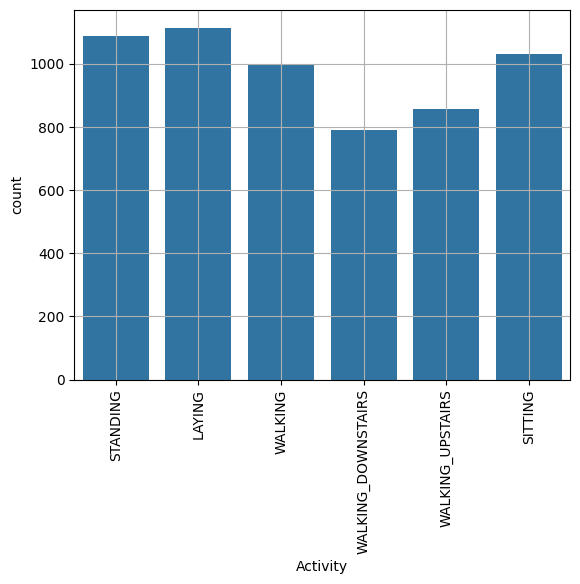

In [34]:
sns.countplot(x = target, data = train)
plt.xticks(rotation = 90)
plt.grid()
plt.show()



---



# **4.이변량 분석**

In [35]:
# 변수의 특성 중요도 계산하기
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    # 변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    # 변수의 특성 중요도 그래프로 그리기
    # if result_only == False :
    #     plt.figure(figsize=(10,20))
    #     sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

    #     plt.xlabel('importance')
    #     plt.ylabel('feature name')
    #     plt.grid()

    return fi_df

## **(1) Feature : Target**

### **전처리**

In [36]:
target = 'Activity'

X = train.drop(target, axis = 1)
y = train.loc[:, target]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

### **모델링**

In [37]:
# 생성
model = RandomForestClassifier()

# 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_valid)

# 평가
print(confusion_matrix(y_valid, y_pred))
print('- '* 60)
print(classification_report(y_valid, y_pred))

[[223   0   0   0   0   0]
 [  0 192  13   0   0   1]
 [  0   8 210   0   0   0]
 [  0   0   0 198   2   0]
 [  0   0   0   2 152   4]
 [  0   0   0   0   1 171]]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       223
           SITTING       0.96      0.93      0.95       206
          STANDING       0.94      0.96      0.95       218
           WALKING       0.99      0.99      0.99       200
WALKING_DOWNSTAIRS       0.98      0.96      0.97       158
  WALKING_UPSTAIRS       0.97      0.99      0.98       172

          accuracy                           0.97      1177
         macro avg       0.97      0.97      0.97      1177
      weighted avg       0.97      0.97      0.97      1177



### **Feature 중요도**
- Target 과 가장 관련 높은 Features 추출

In [38]:
importance_df0 = plot_feature_importance(model.feature_importances_, list(X_train), result_only = False, topn = 'all')

### **주요 Feature 분석**
- Target 과 가장 관련 높은 Features 분석

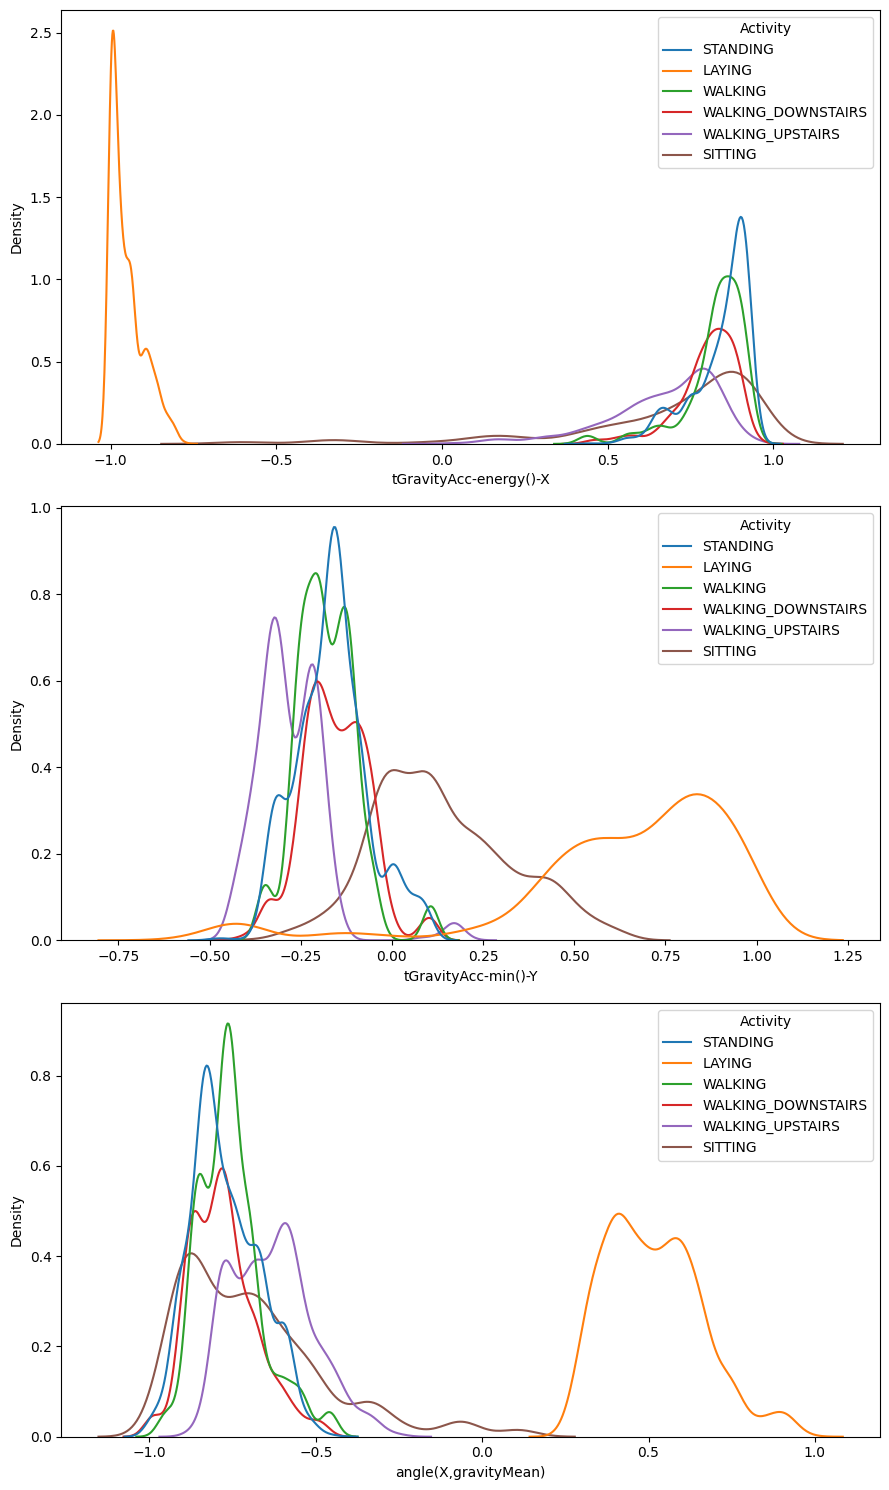

In [39]:
importance = list(importance_df0.feature_name)[:3]
index = 0

plt.figure(figsize=(9, 15))

for i in importance:
  index += 1
  plt.subplot(3, 1, index)

  # KDE Plot
  sns.kdeplot(x=i, data = train, hue = target)

plt.tight_layout()
plt.show()

### **주요 Feature 그룹 분석**
- Target 과 가장 관련 높은 Features 그룹 분석

In [40]:
df = pd.merge(features, importance_df0)

#### **Sensor 그룹**

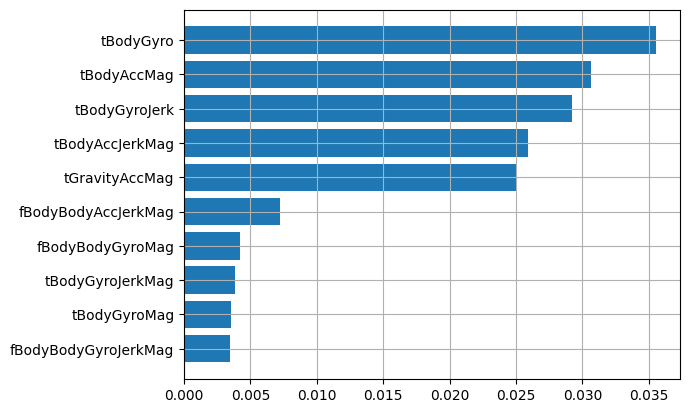

In [41]:
temp = df.groupby('sensor', as_index = False)[['feature_importance']].sum().sort_values('feature_importance')
temp = temp[:10]

plt.barh(temp['sensor'], temp['feature_importance'])
plt.grid()
plt.show()

#### **Sensor + 집계 그룹**

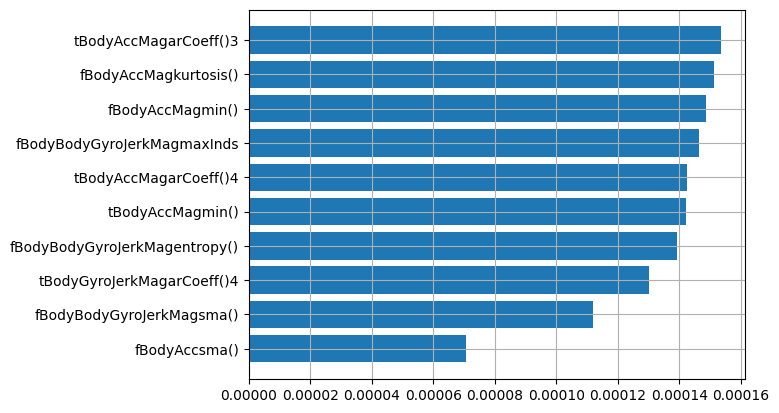

In [ ]:
temp = df.groupby(['sensor','agg'], as_index = False)[['feature_importance']].sum().sort_values('feature_importance')
temp = temp[:10]

plt.barh(temp['sensor'] + temp['agg'], temp['feature_importance'])
plt.grid()
plt.show()



---



## **(2) Feature : 'is_dynamic'**

### **전처리**

In [ ]:
train['is_dynamic'] = np.where(train['Activity'].isin(['STANDING', 'SITTING', 'LAYING']), 0, 1)

In [ ]:
target = 'is_dynamic'

X = train.drop(['Activity', target], axis = 1)
y = train.loc[:, target]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

### **모델링**

In [ ]:
# 생성
model = RandomForestClassifier()

# 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_valid)

# 평가
print(confusion_matrix(y_valid, y_pred))
print('- '* 60)
print(classification_report(y_valid, y_pred))

[[646   1]
 [  0 530]]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       647
           1       1.00      1.00      1.00       530

    accuracy                           1.00      1177
   macro avg       1.00      1.00      1.00      1177
weighted avg       1.00      1.00      1.00      1177



### **Feature 중요도**
- Target 과 가장 관련 높은 Features 추출

In [ ]:
importance_df1 = plot_feature_importance(model.feature_importances_, list(X_train), result_only = False, topn = 'all')

### **주요 Feature 분석**
- Target 과 가장 관련 높은 Features 분석

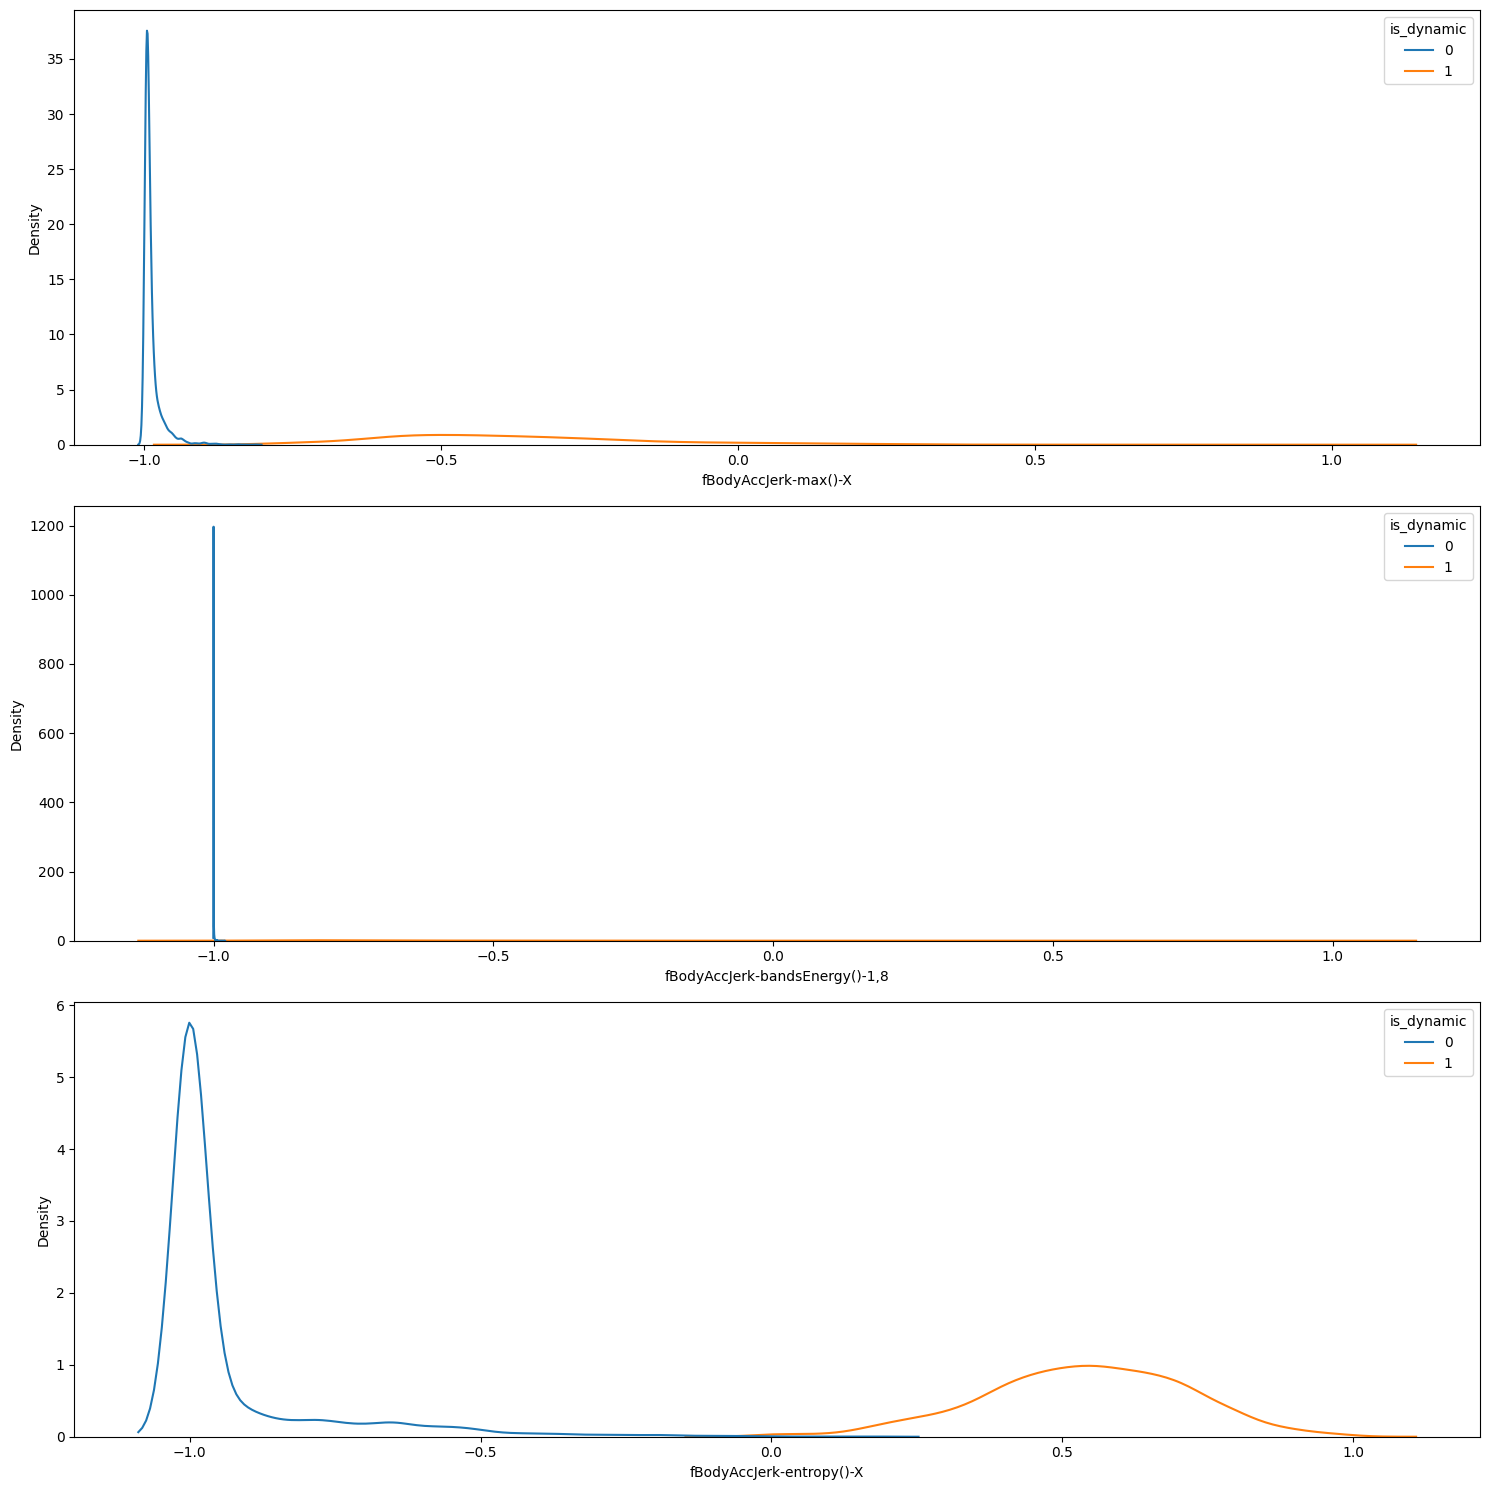

In [ ]:
importance = list(importance_df1.feature_name)[:3]
index = 0

plt.figure(figsize=(15, 15))

for i in importance:
  index += 1
  plt.subplot(3, 1, index)

  # KDE Plot
  sns.kdeplot(x=i, data = train, hue = target)

plt.tight_layout()
plt.show()

### **주요 Feature 그룹 분석**
- Target 과 가장 관련 높은 Features 그룹 분석

In [ ]:
df = pd.merge(features, importance_df1)

#### **Sensor 그룹**

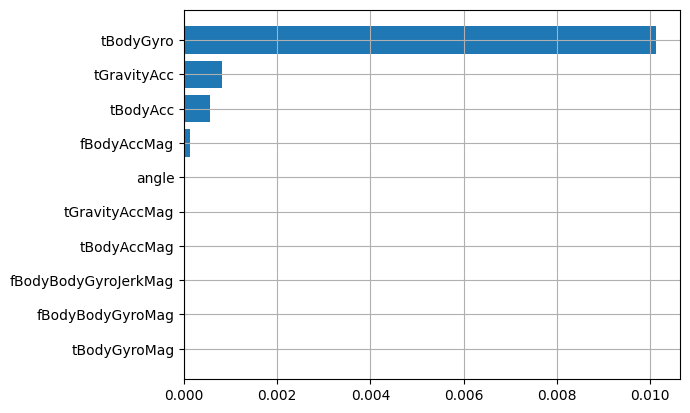

In [ ]:
temp = df.groupby('sensor', as_index = False)[['feature_importance']].sum().sort_values('feature_importance')
temp = temp[:10]

plt.barh(temp['sensor'], temp['feature_importance'])
plt.grid()
plt.show()

#### **Sensor + 집계 그룹**

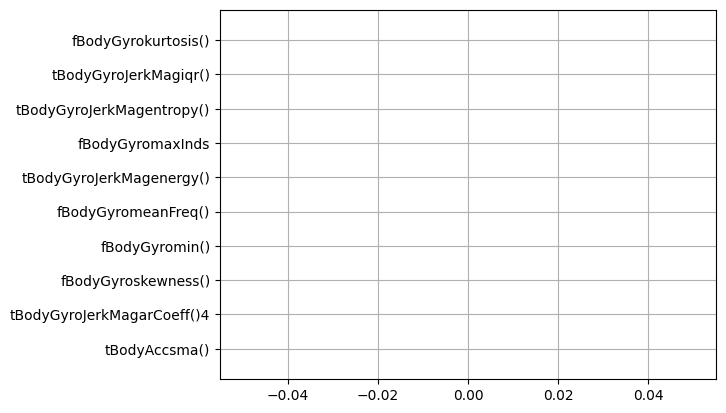

In [ ]:
temp = df.groupby(['sensor','agg'], as_index = False)[['feature_importance']].sum().sort_values('feature_importance')
temp = temp[:10]

plt.barh(temp['sensor'] + temp['agg'], temp['feature_importance'])
plt.grid()
plt.show()



---



## **(3) Feature : 'is_standing'**

### **전처리**

In [ ]:
train['is_standing'] = np.where(train['Activity'] == 'STANDING', 1, 0)

In [ ]:
target = 'is_standing'

X = train.drop(['Activity', 'is_dynamic', target], axis = 1)
y = train.loc[:, target]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

### **모델링**

In [ ]:
# 생성
model = RandomForestClassifier()

# 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_valid)

# 평가
print(confusion_matrix(y_valid, y_pred))
print('- '* 60)
print(classification_report(y_valid, y_pred))

[[951   8]
 [ 13 205]]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       959
           1       0.96      0.94      0.95       218

    accuracy                           0.98      1177
   macro avg       0.97      0.97      0.97      1177
weighted avg       0.98      0.98      0.98      1177



### **Feature 중요도**
- Target 과 가장 관련 높은 Features 추출

In [ ]:
importance_df2 = plot_feature_importance(model.feature_importances_, list(X_train), result_only = False, topn = 'all')

### **주요 Feature 분석**
- Target 과 가장 관련 높은 Features 분석

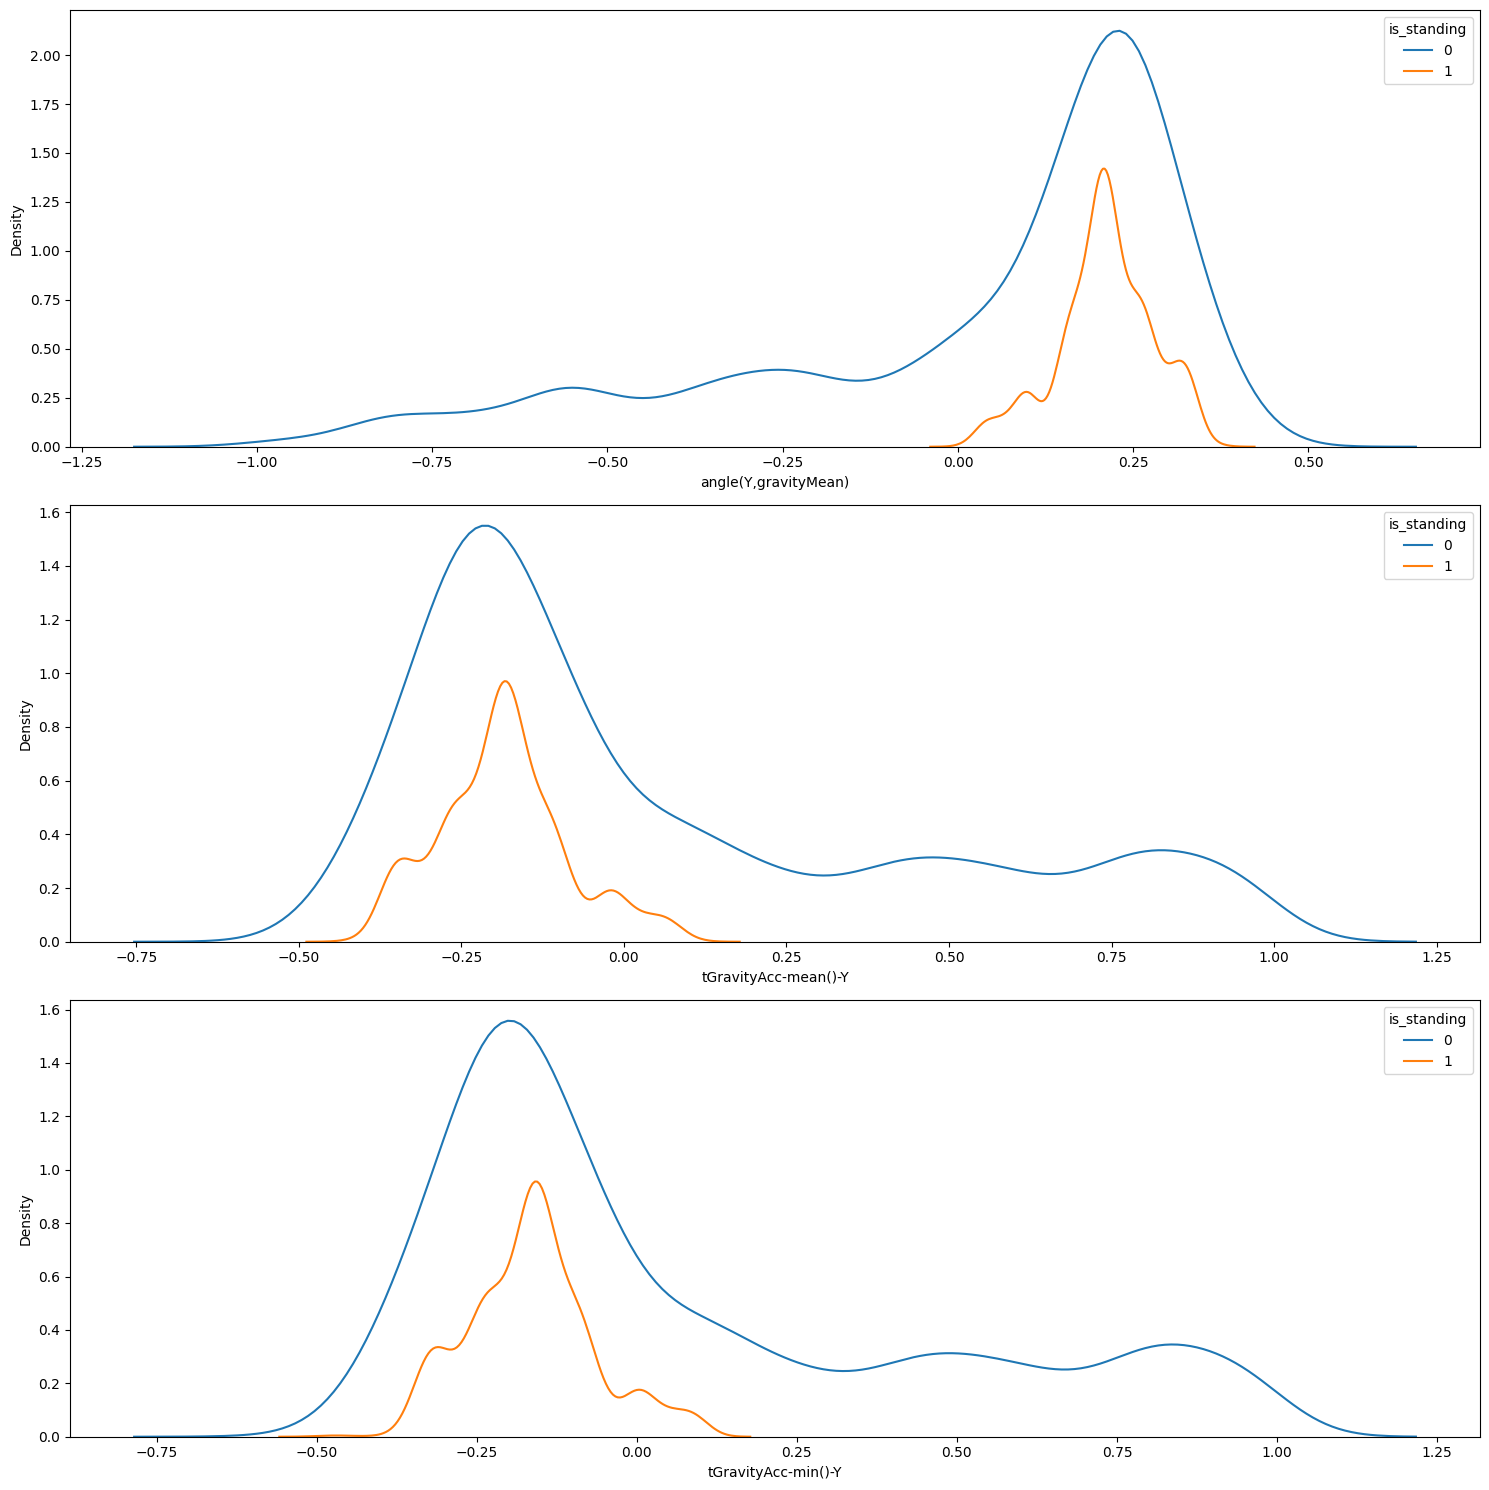

In [ ]:
importance = list(importance_df2.feature_name)[:3]
index = 0

plt.figure(figsize=(15, 15))

for i in importance:
  index += 1
  plt.subplot(3, 1, index)

  # KDE Plot
  sns.kdeplot(x=i, data = train, hue = target)

plt.tight_layout()
plt.show()

### **주요 Feature 그룹 분석**
- Target 과 가장 관련 높은 Features 그룹 분석

In [ ]:
df = pd.merge(features, importance_df2)

#### **Sensor 그룹**

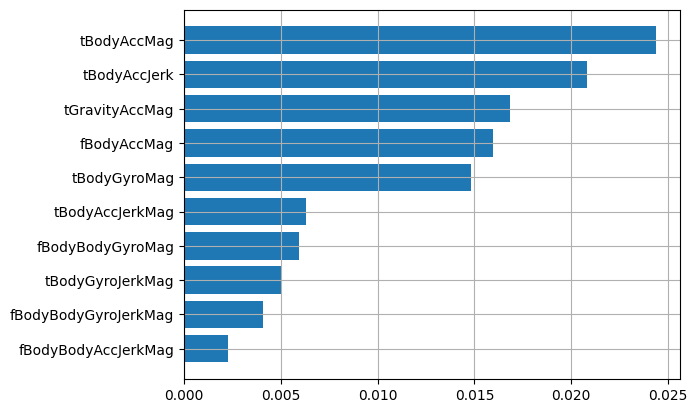

In [ ]:
temp = df.groupby('sensor', as_index = False)[['feature_importance']].sum().sort_values('feature_importance')
temp = temp[:10]

plt.barh(temp['sensor'], temp['feature_importance'])
plt.grid()
plt.show()

#### **Sensor + 집계 그룹**

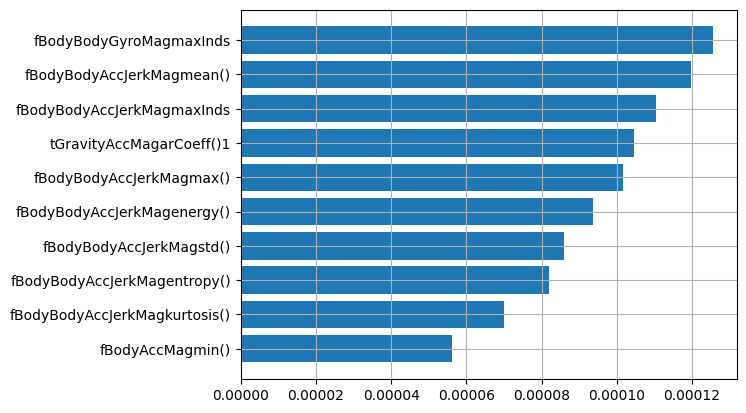

In [ ]:
temp = df.groupby(['sensor','agg'], as_index = False)[['feature_importance']].sum().sort_values('feature_importance')
temp = temp[:10]

plt.barh(temp['sensor'] + temp['agg'], temp['feature_importance'])
plt.grid()
plt.show()



---



## **(4) Feature : 'is_sitting'**

### **전처리**

In [ ]:
train['is_sitting'] = np.where(train['Activity'] == 'SITTING', 1, 0)

In [ ]:
target = 'is_sitting'

X = train.drop(['Activity', 'is_dynamic', 'is_standing', target], axis = 1)
y = train.loc[:, target]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

### **모델링**

In [ ]:
# 생성
model = RandomForestClassifier()

# 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_valid)

# 평가
print(confusion_matrix(y_valid, y_pred))
print('- '* 60)
print(classification_report(y_valid, y_pred))

[[967   3]
 [ 15 192]]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       970
           1       0.98      0.93      0.96       207

    accuracy                           0.98      1177
   macro avg       0.98      0.96      0.97      1177
weighted avg       0.98      0.98      0.98      1177



### **Feature 중요도**
- Target 과 가장 관련 높은 Features 추출

In [ ]:
importance_df3 = plot_feature_importance(model.feature_importances_, list(X_train), result_only = False, topn = 'all')

### **주요 Feature 분석**
- Target 과 가장 관련 높은 Features 분석

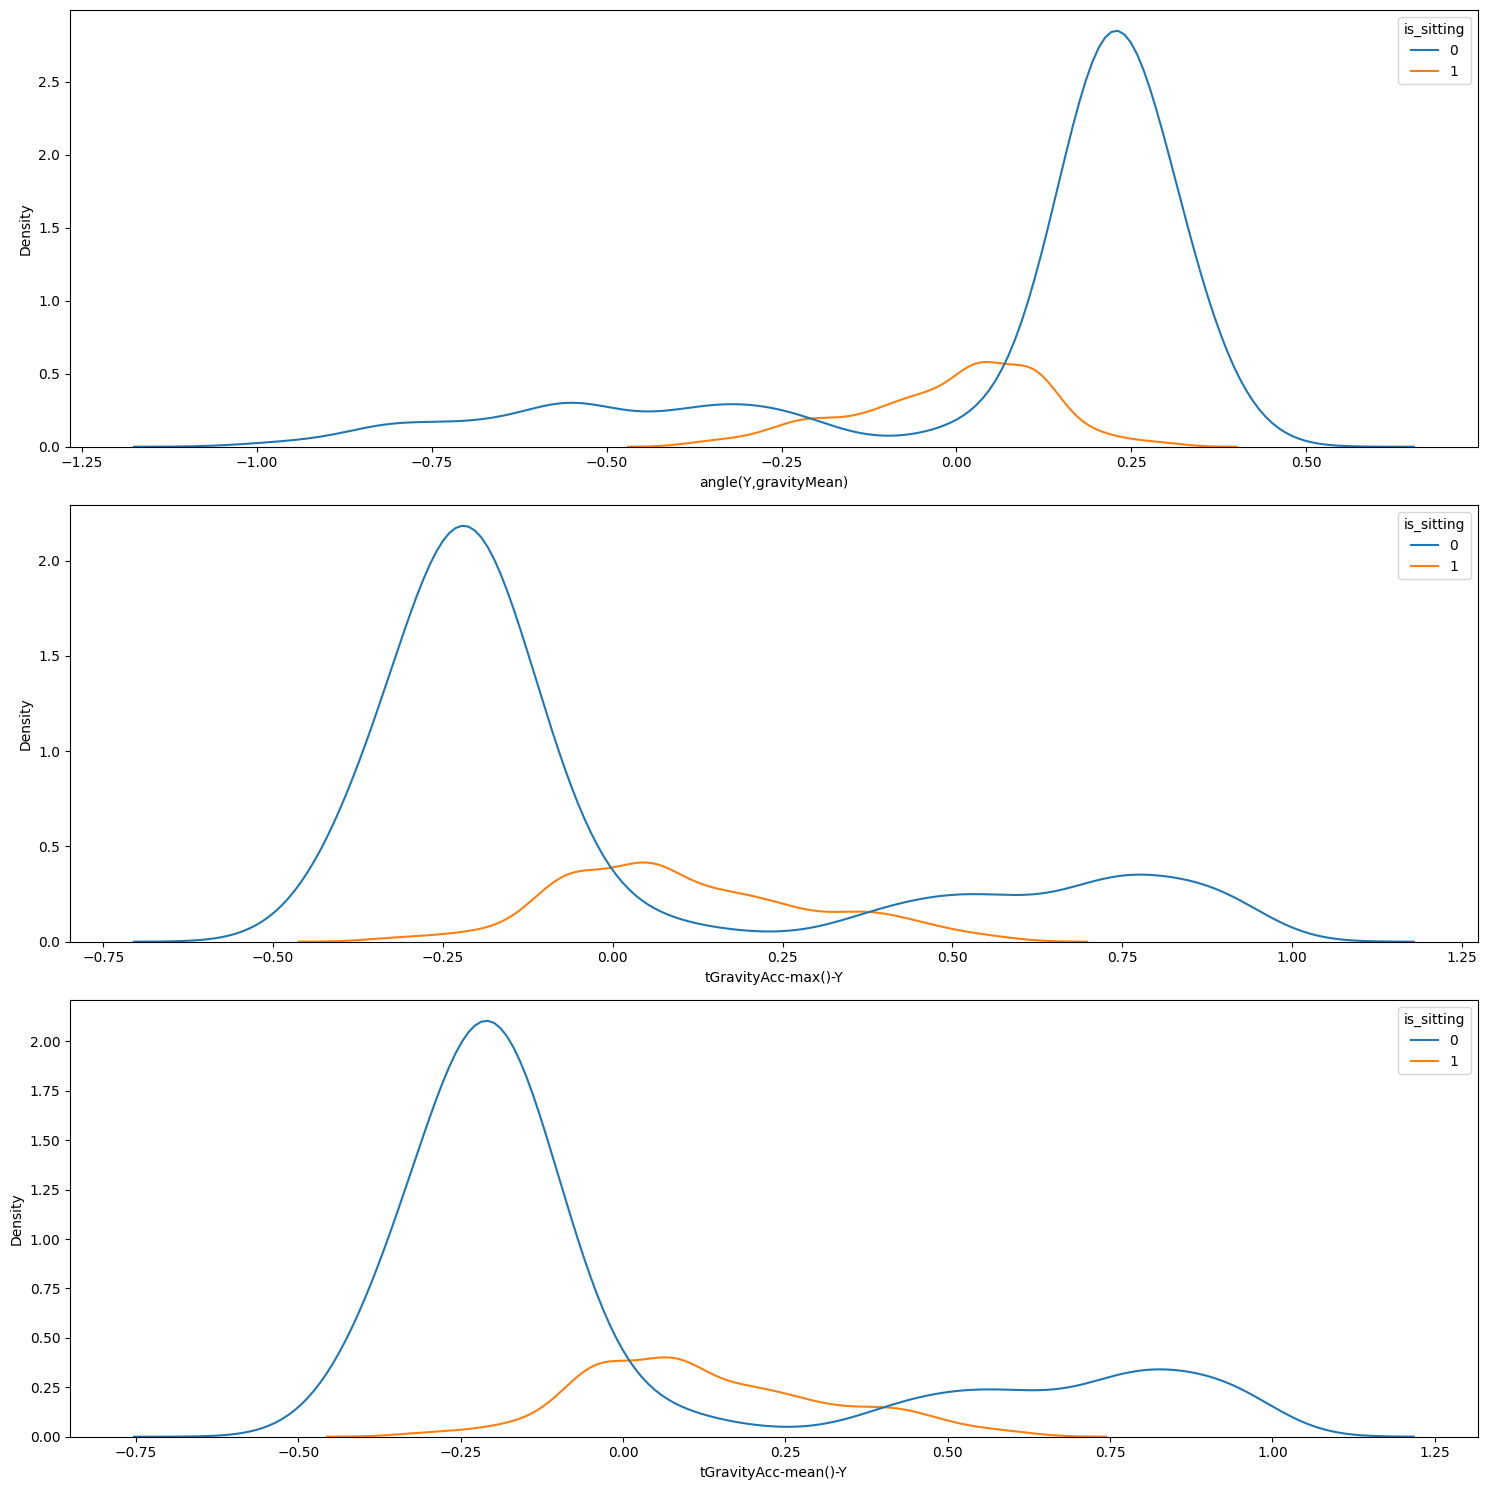

In [ ]:
importance = list(importance_df3.feature_name)[:3]
index = 0

plt.figure(figsize=(15, 15))

for i in importance:
  index += 1
  plt.subplot(3, 1, index)

  # KDE Plot
  sns.kdeplot(x=i, data = train, hue = target)

plt.tight_layout()
plt.show()

### **주요 Feature 그룹 분석**
- Target 과 가장 관련 높은 Features 그룹 분석

In [ ]:
df = pd.merge(features, importance_df3)

#### **Sensor 그룹**

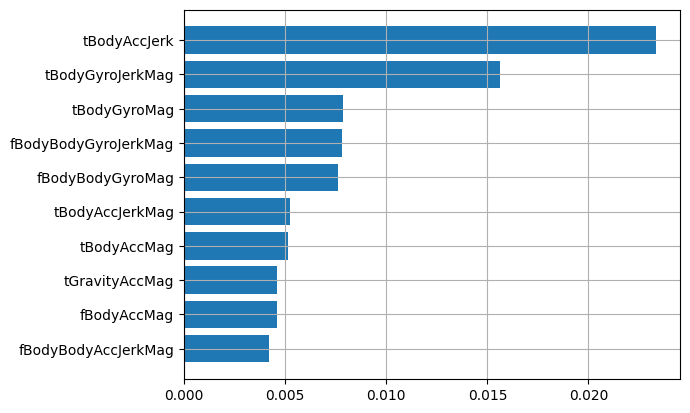

In [ ]:
temp = df.groupby('sensor', as_index = False)[['feature_importance']].sum().sort_values('feature_importance')
temp = temp[:10]

plt.barh(temp['sensor'], temp['feature_importance'])
plt.grid()
plt.show()

#### **Sensor + 집계 그룹**

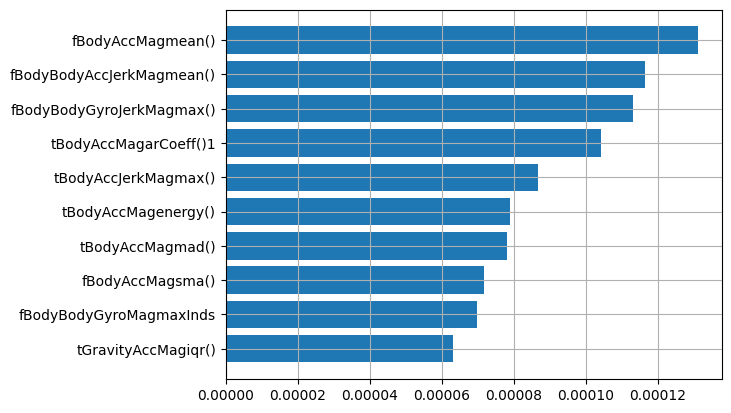

In [ ]:
temp = df.groupby(['sensor','agg'], as_index = False)[['feature_importance']].sum().sort_values('feature_importance')
temp = temp[:10]

plt.barh(temp['sensor'] + temp['agg'], temp['feature_importance'])
plt.grid()
plt.show()



---



## **(5) Feature : 'is_laying'**

### **전처리**

In [ ]:
train['is_laying'] = np.where(train['Activity'] == 'LAYING', 1, 0)

In [ ]:
target = 'is_laying'

X = train.drop(['Activity', 'is_dynamic', 'is_standing','is_sitting', target], axis = 1)
y = train.loc[:, target]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

### **모델링**

In [ ]:
# 생성
model = RandomForestClassifier()

# 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_valid)

# 평가
print(confusion_matrix(y_valid, y_pred))
print('- '* 60)
print(classification_report(y_valid, y_pred))

[[954   0]
 [  0 223]]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       954
           1       1.00      1.00      1.00       223

    accuracy                           1.00      1177
   macro avg       1.00      1.00      1.00      1177
weighted avg       1.00      1.00      1.00      1177



### **Feature 중요도**
- Target 과 가장 관련 높은 Features 추출

In [ ]:
importance_df4 = plot_feature_importance(model.feature_importances_, list(X_train), result_only = False, topn = 'all')

### **주요 Feature 분석**
- Target 과 가장 관련 높은 Features 분석

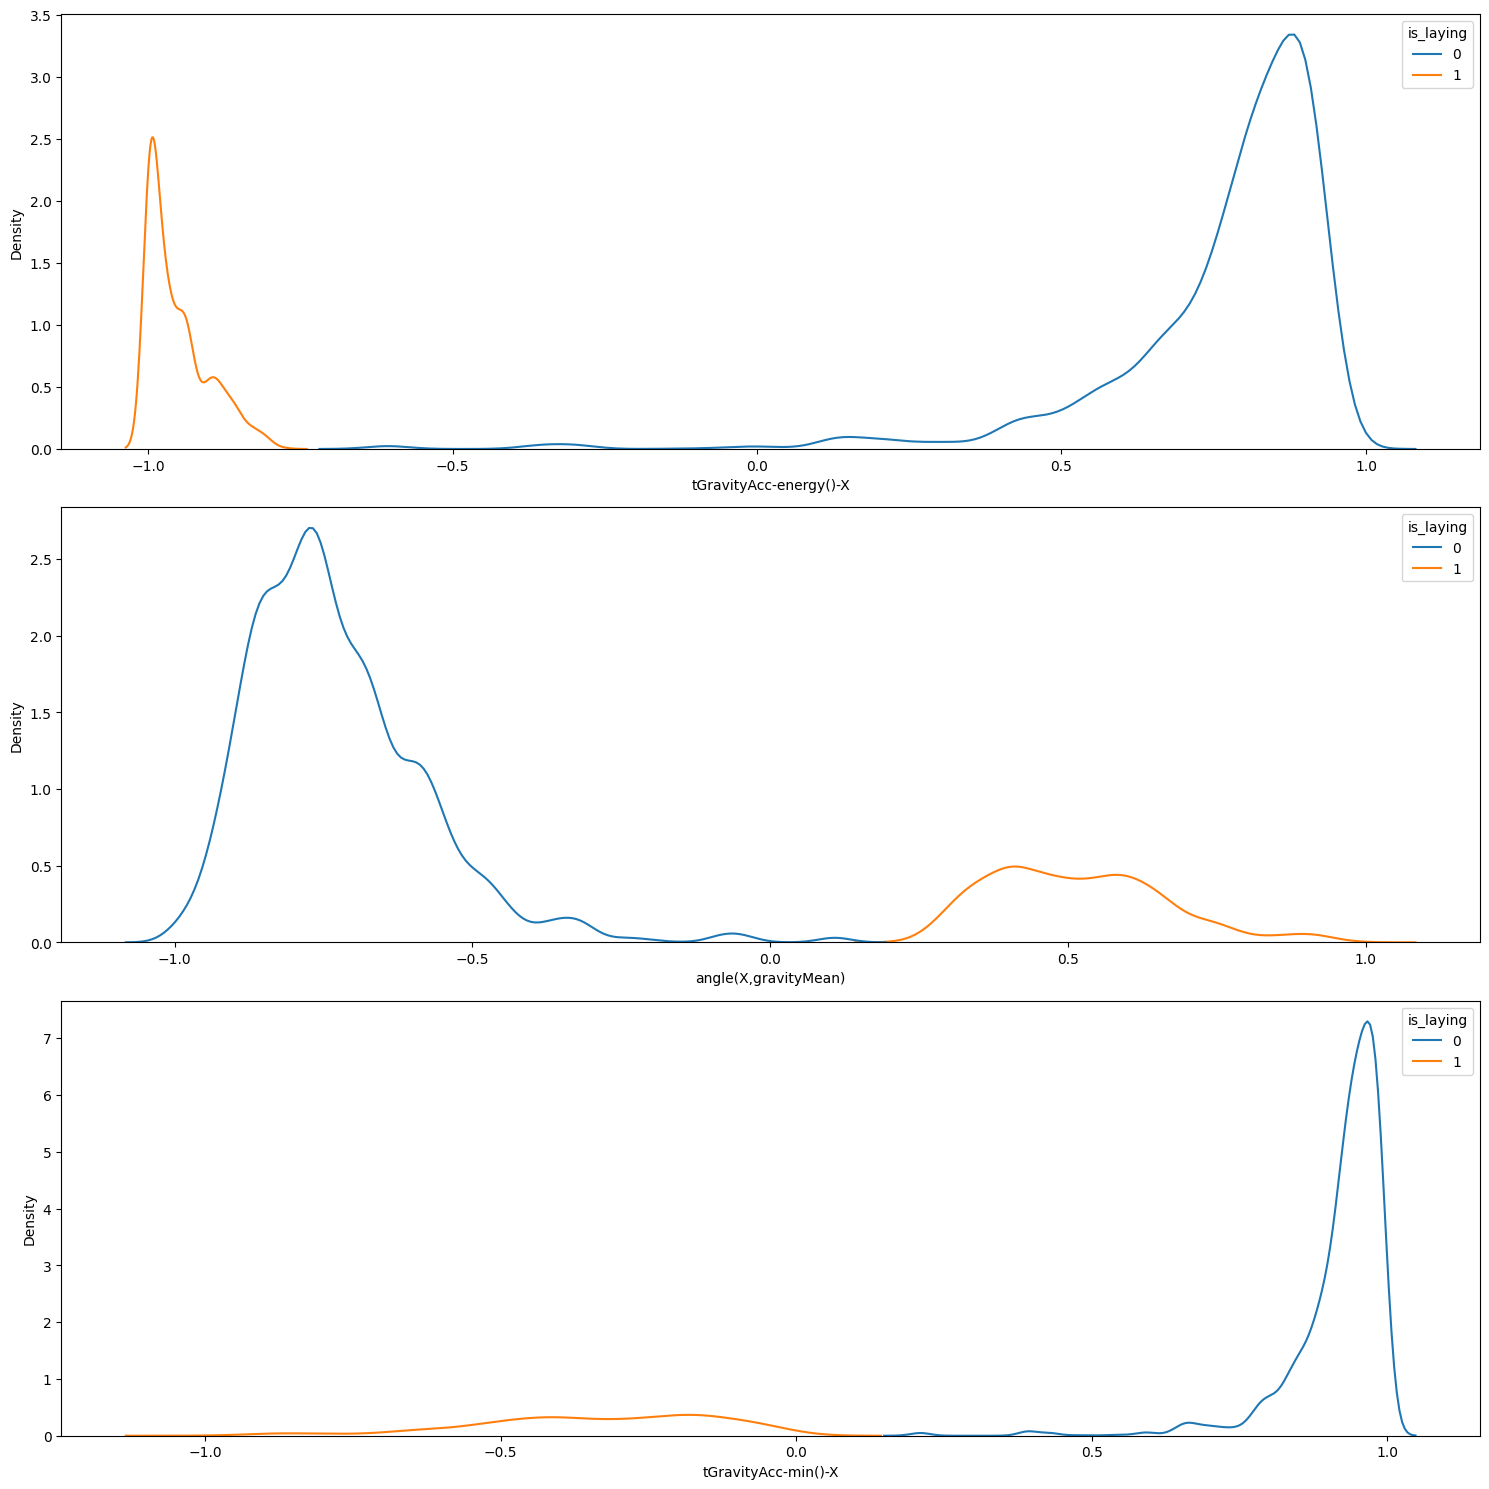

In [ ]:
importance = list(importance_df4.feature_name)[:3]
index = 0

plt.figure(figsize=(15, 15))

for i in importance:
  index += 1
  plt.subplot(3, 1, index)

  # KDE Plot
  sns.kdeplot(x=i, data = train, hue = target)

plt.tight_layout()
plt.show()

### **주요 Feature 그룹 분석**
- Target 과 가장 관련 높은 Features 그룹 분석

In [ ]:
df = pd.merge(features, importance_df4)

#### **Sensor 그룹**

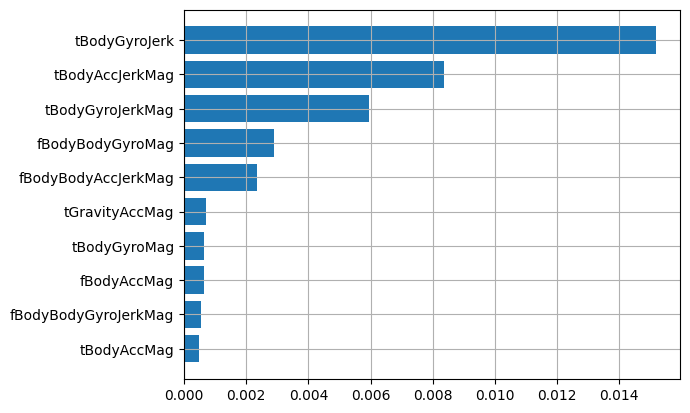

In [ ]:
temp = df.groupby('sensor', as_index = False)[['feature_importance']].sum().sort_values('feature_importance')
temp = temp[:10]

plt.barh(temp['sensor'], temp['feature_importance'])
plt.grid()
plt.show()

#### **Sensor + 집계 그룹**

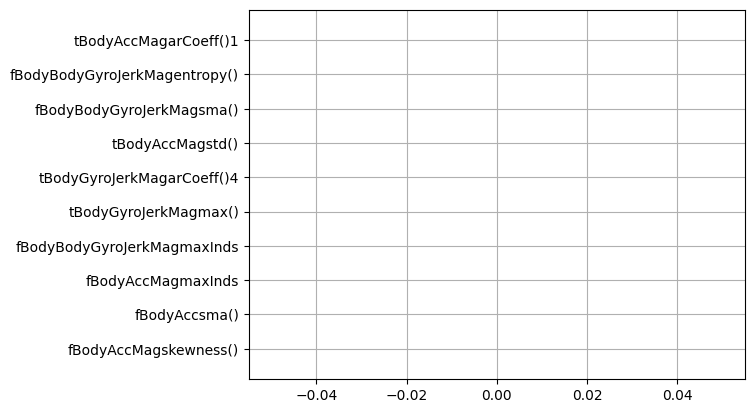

In [ ]:
temp = df.groupby(['sensor','agg'], as_index = False)[['feature_importance']].sum().sort_values('feature_importance')
temp = temp[:10]

plt.barh(temp['sensor'] + temp['agg'], temp['feature_importance'])
plt.grid()
plt.show()



---



## **(6) Feature : 'is_walking'**

### **전처리**

In [ ]:
train['is_walking'] = np.where(train['Activity'] == 'WALKING', 1, 0)

In [ ]:
target = 'is_walking'

X = train.drop(['Activity', 'is_dynamic', 'is_standing','is_sitting', 'is_laying', target], axis = 1)
y = train.loc[:, target]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

### **모델링**

In [ ]:
# 생성
model = RandomForestClassifier()

# 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_valid)

# 평가
print(confusion_matrix(y_valid, y_pred))
print('- '* 60)
print(classification_report(y_valid, y_pred))

[[977   0]
 [  6 194]]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       977
           1       1.00      0.97      0.98       200

    accuracy                           0.99      1177
   macro avg       1.00      0.98      0.99      1177
weighted avg       0.99      0.99      0.99      1177



### **Feature 중요도**
- Target 과 가장 관련 높은 Features 추출

In [ ]:
importance_df5 = plot_feature_importance(model.feature_importances_, list(X_train), result_only = False, topn = 'all')

### **주요 Feature 분석**
- Target 과 가장 관련 높은 Features 분석

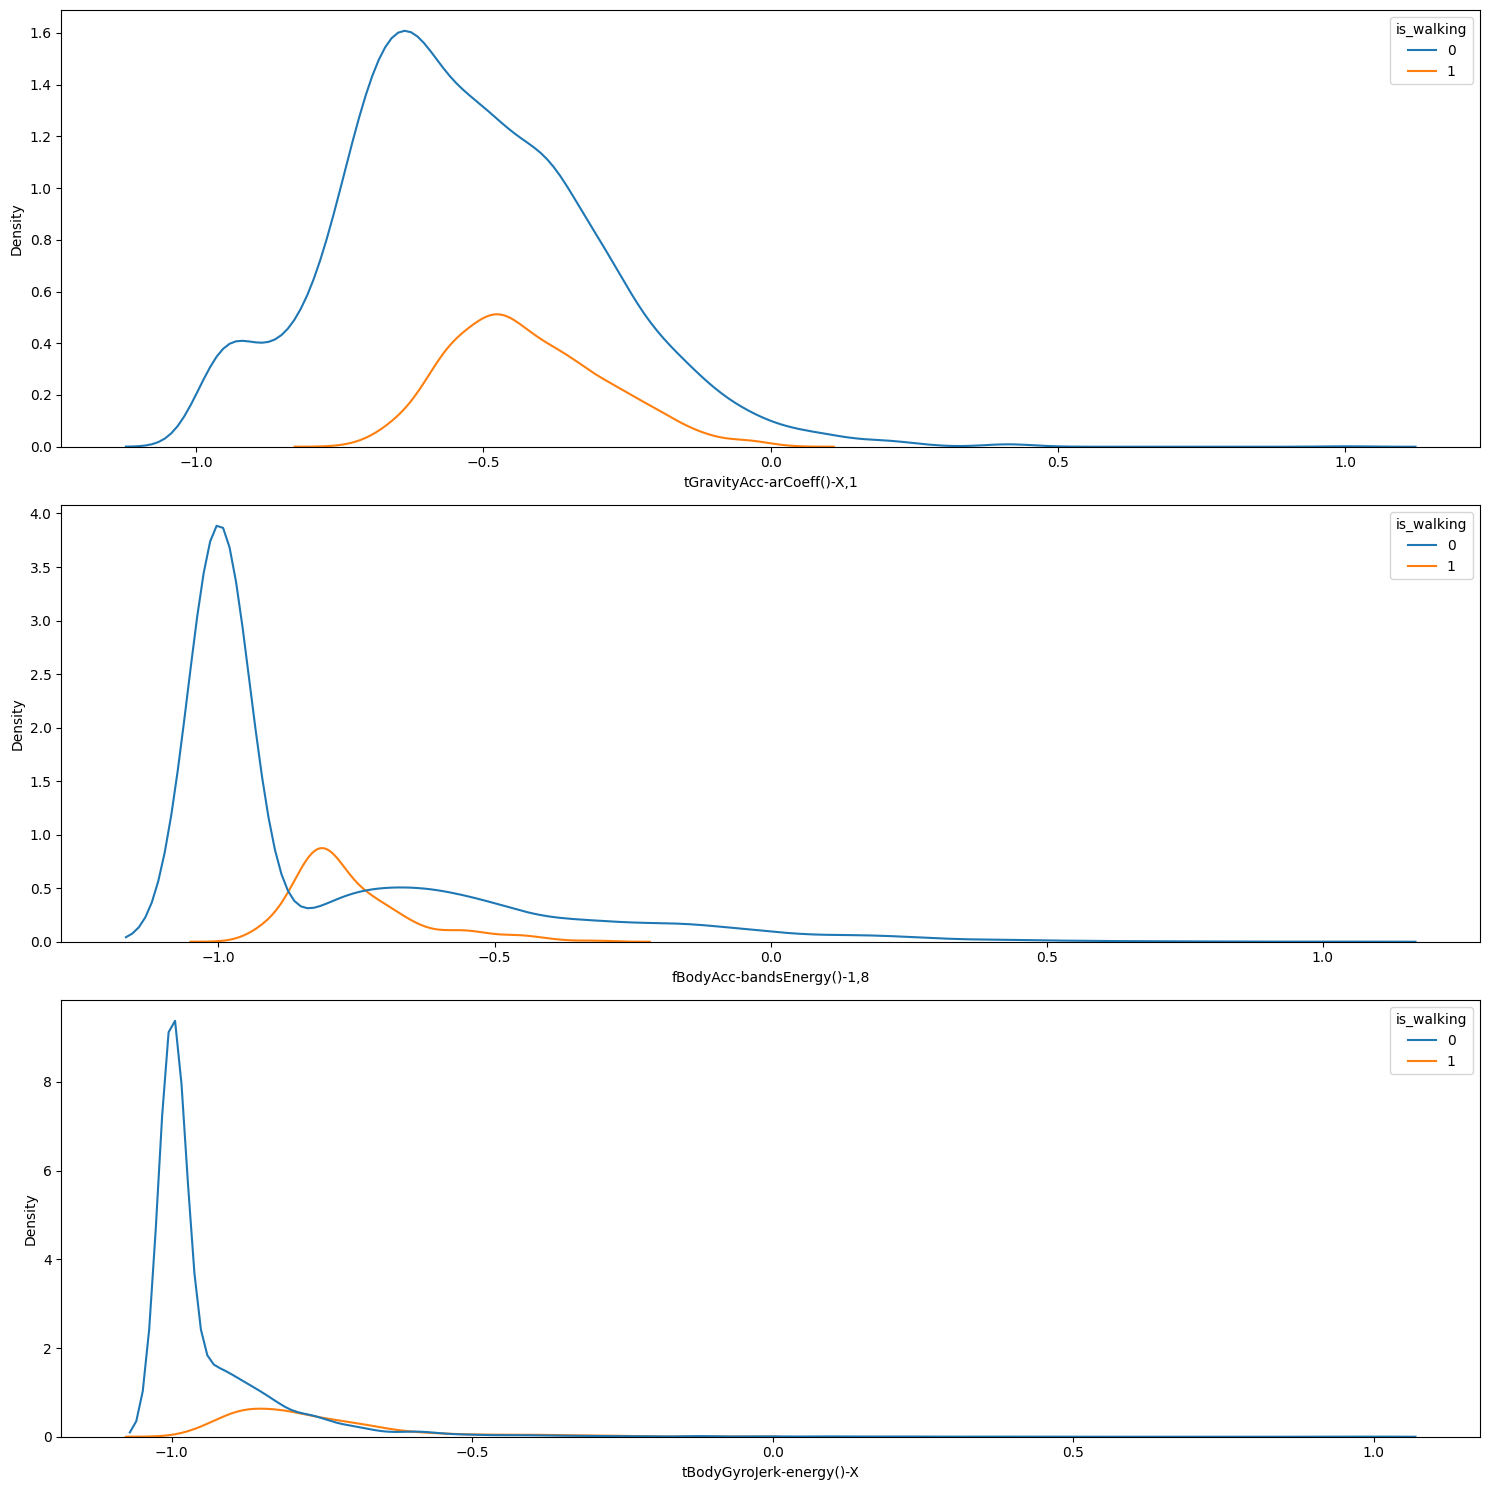

In [ ]:
importance = list(importance_df5.feature_name)[:3]
index = 0

plt.figure(figsize=(15, 15))

for i in importance:
  index += 1
  plt.subplot(3, 1, index)

  # KDE Plot
  sns.kdeplot(x=i, data = train, hue = target)

plt.tight_layout()
plt.show()

### **주요 Feature 그룹 분석**
- Target 과 가장 관련 높은 Features 그룹 분석

In [ ]:
df = pd.merge(features, importance_df5)

#### **Sensor 그룹**

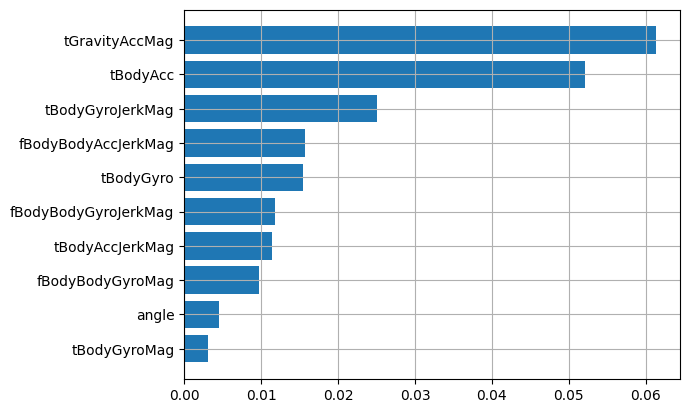

In [ ]:
temp = df.groupby('sensor', as_index = False)[['feature_importance']].sum().sort_values('feature_importance')
temp = temp[:10]

plt.barh(temp['sensor'], temp['feature_importance'])
plt.grid()
plt.show()

#### **Sensor + 집계 그룹**

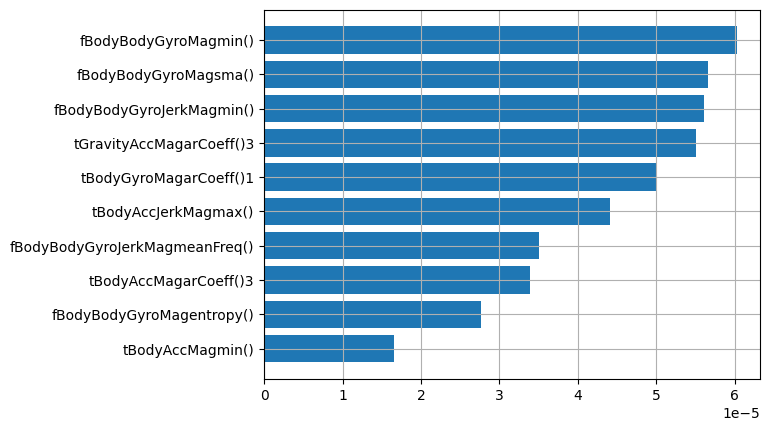

In [ ]:
temp = df.groupby(['sensor','agg'], as_index = False)[['feature_importance']].sum().sort_values('feature_importance')
temp = temp[:10]

plt.barh(temp['sensor'] + temp['agg'], temp['feature_importance'])
plt.grid()
plt.show()



---



## **(7) Feature : 'is_walking_up'**

### **전처리**

In [ ]:
train['is_walking_up'] = np.where(train['Activity'] == 'WALKING_UPSTAIRS', 1, 0)

In [ ]:
target = 'is_walking'

X = train.drop(['Activity', 'is_dynamic', 'is_standing','is_sitting', 'is_laying', 'is_walking', target], axis = 1)
y = train.loc[:, target]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

### **모델링**

In [ ]:
# 생성
model = RandomForestClassifier()

# 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_valid)

# 평가
print(confusion_matrix(y_valid, y_pred))
print('- '* 60)
print(classification_report(y_valid, y_pred))

[[977   0]
 [  5 195]]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       977
           1       1.00      0.97      0.99       200

    accuracy                           1.00      1177
   macro avg       1.00      0.99      0.99      1177
weighted avg       1.00      1.00      1.00      1177



### **Feature 중요도**
- Target 과 가장 관련 높은 Features 추출

In [ ]:
importance_df6 = plot_feature_importance(model.feature_importances_, list(X_train), result_only = False, topn = 'all')

### **주요 Feature 분석**
- Target 과 가장 관련 높은 Features 분석

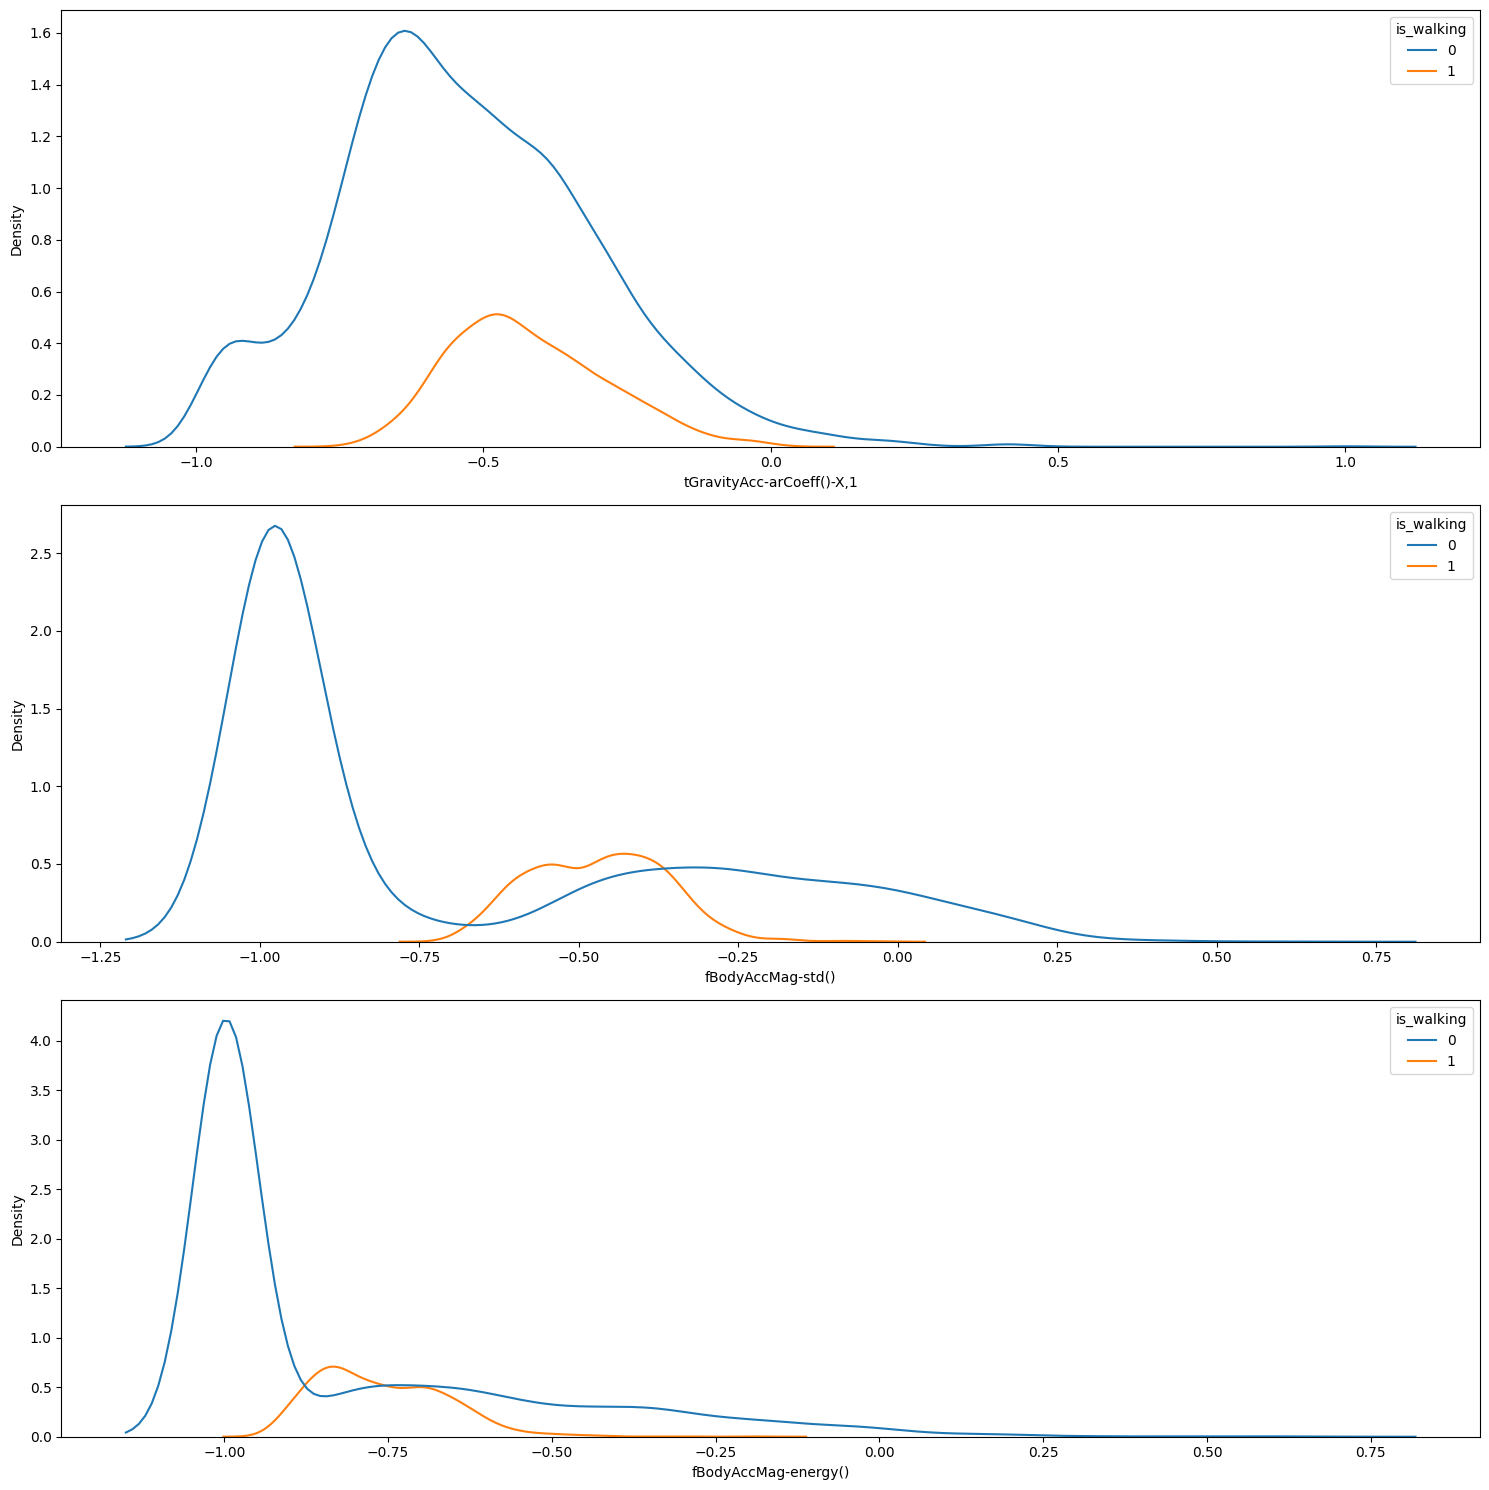

In [ ]:
importance = list(importance_df6.feature_name)[:3]
index = 0

plt.figure(figsize=(15, 15))

for i in importance:
  index += 1
  plt.subplot(3, 1, index)

  # KDE Plot
  sns.kdeplot(x=i, data = train, hue = target)

plt.tight_layout()
plt.show()

### **주요 Feature 그룹 분석**
- Target 과 가장 관련 높은 Features 그룹 분석

In [ ]:
df = pd.merge(features, importance_df6)

#### **Sensor 그룹**

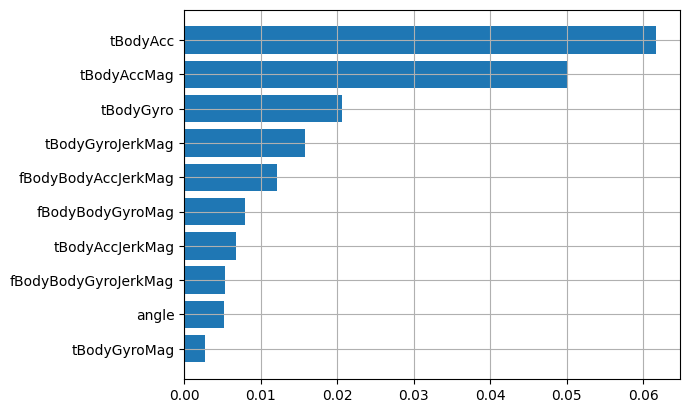

In [ ]:
temp = df.groupby('sensor', as_index = False)[['feature_importance']].sum().sort_values('feature_importance')
temp = temp[:10]

plt.barh(temp['sensor'], temp['feature_importance'])
plt.grid()
plt.show()

#### **Sensor + 집계 그룹**

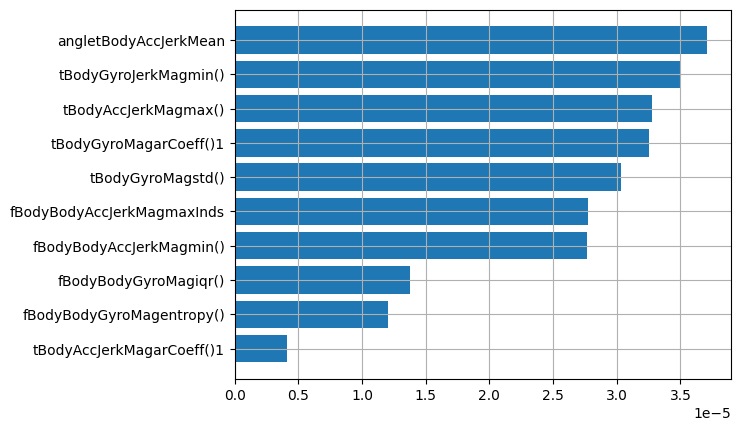

In [ ]:
temp = df.groupby(['sensor','agg'], as_index = False)[['feature_importance']].sum().sort_values('feature_importance')
temp = temp[:10]

plt.barh(temp['sensor'] + temp['agg'], temp['feature_importance'])
plt.grid()
plt.show()



---



## **(8) Feature : 'is_walking_down'**

### **전처리**

In [ ]:
train['is_walking_down'] = np.where(train['Activity'] == 'WALKING_DOWNSTAIRS', 1, 0)

In [ ]:
target = 'is_walking_down'

X = train.drop(['Activity', 'is_dynamic', 'is_standing','is_sitting', 'is_laying','is_walking_up', target], axis = 1)
y = train.loc[:, target]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

### **모델링**

In [ ]:
# 생성
model = RandomForestClassifier()

# 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_valid)

# 평가
print(confusion_matrix(y_valid, y_pred))
print('- '* 60)
print(classification_report(y_valid, y_pred))

[[1018    1]
 [   9  149]]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1019
           1       0.99      0.94      0.97       158

    accuracy                           0.99      1177
   macro avg       0.99      0.97      0.98      1177
weighted avg       0.99      0.99      0.99      1177



### **Feature 중요도**
- Target 과 가장 관련 높은 Features 추출

In [ ]:
importance_df7 = plot_feature_importance(model.feature_importances_, list(X_train), result_only = False, topn = 'all')

### **주요 Feature 분석**
- Target 과 가장 관련 높은 Features 분석

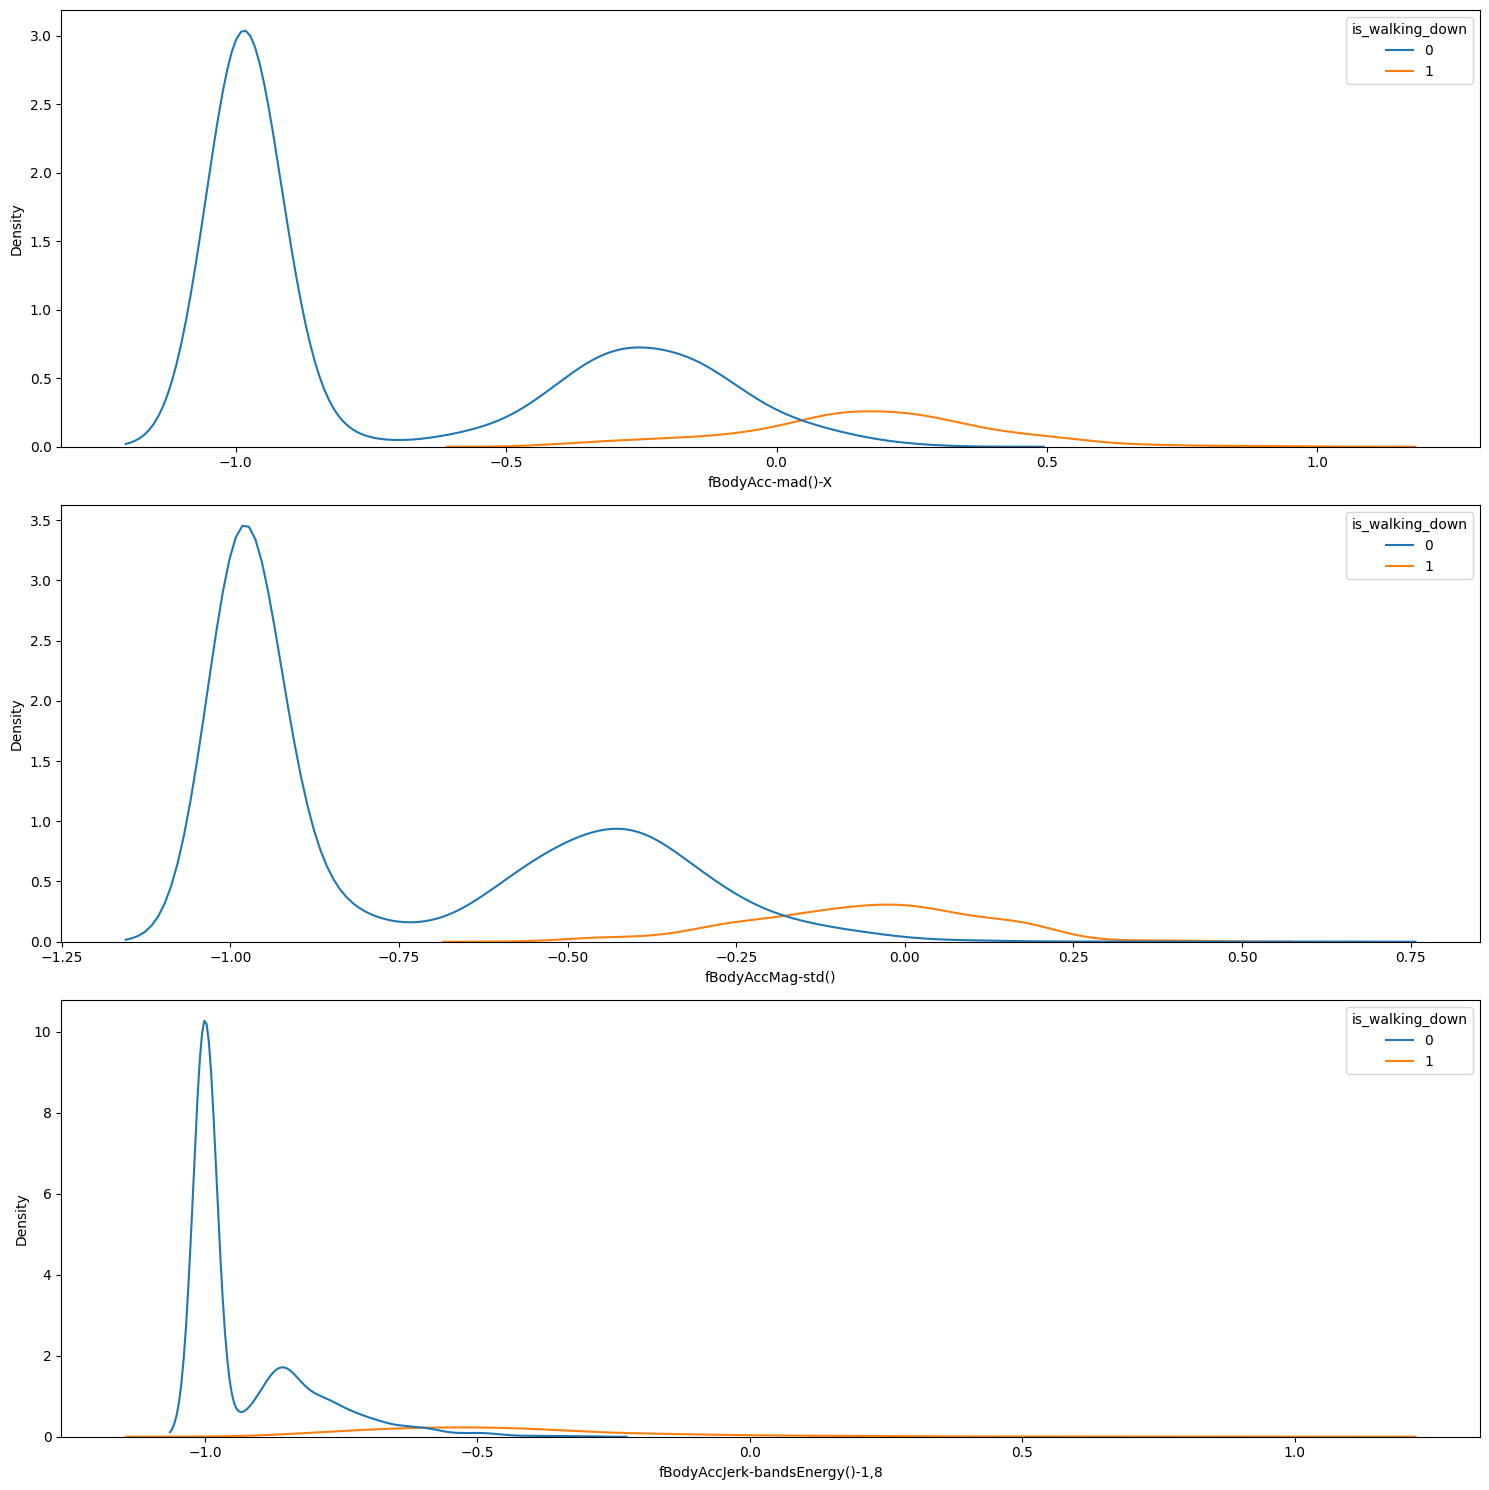

In [ ]:
importance = list(importance_df7.feature_name)[:3]
index = 0

plt.figure(figsize=(15, 15))

for i in importance:
  index += 1
  plt.subplot(3, 1, index)

  # KDE Plot
  sns.kdeplot(x=i, data = train, hue = target)

plt.tight_layout()
plt.show()

### **주요 Feature 그룹 분석**
- Target 과 가장 관련 높은 Features 그룹 분석

In [ ]:
df = pd.merge(features, importance_df7)

#### **Sensor 그룹**

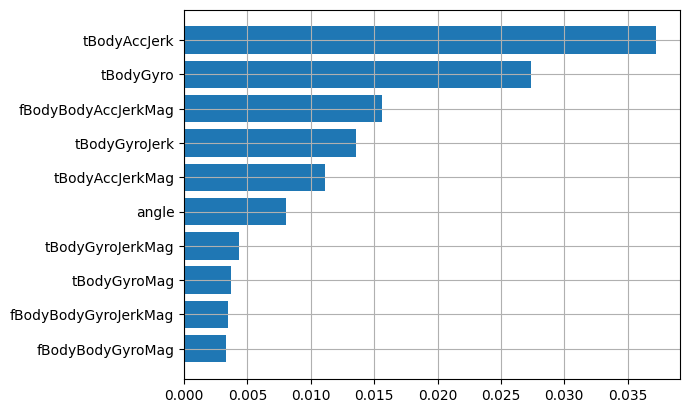

In [ ]:
temp = df.groupby('sensor', as_index = False)[['feature_importance']].sum().sort_values('feature_importance')
temp = temp[:10]

plt.barh(temp['sensor'], temp['feature_importance'])
plt.grid()
plt.show()

#### **Sensor + 집계 그룹**

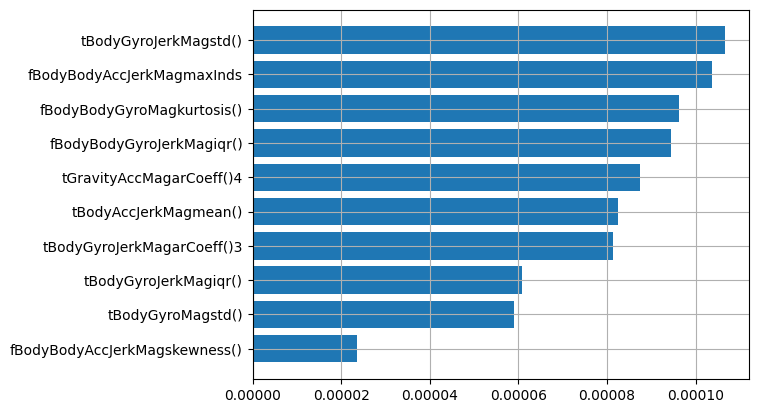

In [ ]:
temp = df.groupby(['sensor','agg'], as_index = False)[['feature_importance']].sum().sort_values('feature_importance')
temp = temp[:10]

plt.barh(temp['sensor'] + temp['agg'], temp['feature_importance'])
plt.grid()
plt.show()



---



# **5.특성 중요도 저장하기**

In [ ]:
importance_df0.rename(columns={'feature_importance':'feature_importance_target'}, inplace=True)
importance_df1.rename(columns={'feature_importance':'feature_importance_dynamic'}, inplace=True)
importance_df2.rename(columns={'feature_importance':'feature_importance_standing'}, inplace=True)
importance_df3.rename(columns={'feature_importance':'feature_importance_sitting'}, inplace=True)
importance_df4.rename(columns={'feature_importance':'feature_importance_laying'}, inplace=True)
importance_df5.rename(columns={'feature_importance':'feature_importance_walking'}, inplace=True)
importance_df6.rename(columns={'feature_importance':'feature_importance_upstairs'}, inplace=True)
importance_df7.rename(columns={'feature_importance':'feature_importance_downstairs'}, inplace=True)

In [ ]:
result = pd.merge(features, importance_df0)
result = pd.merge(result, importance_df1)
result = pd.merge(result, importance_df2)
result = pd.merge(result, importance_df3)
result = pd.merge(result, importance_df4)
result = pd.merge(result, importance_df5)
result = pd.merge(result, importance_df6)
result = pd.merge(result, importance_df7)

result

,sensor,agg,axis,feature_name,feature_importance_target,feature_importance_dynamic,feature_importance_standing,feature_importance_sitting,feature_importance_laying,feature_importance_walking,feature_importance_upstairs,feature_importance_downstairs
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X,0.000188,0.000000,0.000422,0.000323,0.000071,0.000238,0.000101,0.000208
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y,0.000308,0.000000,0.000708,0.000784,0.000201,0.000106,0.000093,0.000375
2,tBodyAcc,mean(),Z,tBodyAcc-mean()-Z,0.000261,0.000009,0.000541,0.000313,0.000032,0.000095,0.000070,0.000222
3,tBodyAcc,std(),X,tBodyAcc-std()-X,0.005368,0.000000,0.005566,0.003566,0.000281,0.012093,0.016093,0.035579
4,tBodyAcc,std(),Y,tBodyAcc-std()-Y,0.000380,0.000000,0.006059,0.000191,0.000161,0.000223,0.000125,0.001720
...,...,...,...,...,...,...,...,...,...,...,...,...
556,angle,tBodyGyroMean,gravityMean,"angle(tBodyGyroMean,gravityMean)",0.000319,0.000000,0.000916,0.000893,0.000206,0.000310,0.000265,0.000399
557,angle,tBodyGyroJerkMean,gravityMean,"angle(tBodyGyroJerkMean,gravityMean)",0.000885,0.000000,0.001293,0.001331,0.000022,0.000101,0.000222,0.000168
558,angle,X,gravityMean,"angle(X,gravityMean)",0.031815,0.000017,0.024254,0.019319,0.084057,0.001869,0.002248,0.002615
559,angle,Y,gravityMean,"angle(Y,gravityMean)",0.029357,0.000000,0.072359,0.046796,0.034906,0.001269,0.002143,0.002908


In [ ]:
import joblib

# 저장
joblib.dump(result, 'important_features.pkl')

['important_features.pkl']